In [1]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import os.path 
from os import listdir
import os, sys

In [2]:
from IPython.core.display import HTML
from IPython.core.pylabtools import figsize
from ipywidgets import interact, interactive, fixed
from IPython.display import clear_output, display, HTML
from IPython.html import widgets
from PIL import Image

/Users/kellygarcia/anaconda/lib/python2.7/site-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


In [3]:
import numpy as np
import math as m
import csv
#import plotly.plotly as py
#import plotly.graph_objs as go

In [173]:
path = "/Users/kellygarcia/Google Drive/Test/Text Files/1.2kW 4.0mT/"
dirs = os.listdir(path)
wavelength = []
intensity = []
current = []
magnetic_field = []
for filename in dirs:
    if filename.endswith('avg.txt'):
        print filename
        reader = csv.reader(open(path + filename, 'r'), delimiter='\n')
        result = np.array(list(reader))
        for i in range(0,len(result)):
            p = result[i]
            dat = p[0].split()
            w = float(dat[0])
            i = float(dat[1])
            c = float(dat[2])
            m = float(dat[3])
            wavelength.append(w)
            intensity.append(i)
            current.append(c)
            magnetic_field.append(m)
                
len(wavelength)

#we have uploaded the files and see that here, there are 4 files (others may only have 2 at a single port- that's okay)

Port1 1.2kW 25sccm 4.0mT Forward 2017-08-19 no avg.txt
Port1 1.2kW 25sccm 4.0mT Reverse 2017-08-19 no avg.txt
Port3 1.2kW 25sccm 4.0mT Forward 2017-08-22 no avg.txt
Port3 1.2kW 25sccm 4.0mT Reverse 2017-08-22 no avg.txt


145920

In [174]:
new_c = [current[i:i+3648] for i in range(0, len(intensity), 3648)]

#creating a nested list for the current

In [192]:
#since all the current values are stored in a single list, now let's check how the list is divided by the
#different files
ew = []
ew1 = []
for i in range(0,len(new_c)):
    ew.append(new_c[i][1] - new_c[i-1][1])
for i in range(0,len(new_c)):
    if ew[i] == 0:
        ew1.append(i)
ew1, len(ew1)

#the indices below are where a new file or scan begins in the order appearing after line 173 above

([9, 29], 2)

In [176]:
#this was a check to confirm that the stored variables above had the correct current 
ap = []
for i in range(0, len(cf3)):
    ap.append(cr3[i][1])
ap

[230.0, 220.0, 210.0, 200.0, 190.0, 180.0, 170.0, 160.0, 150.0, 140.0, 130.0]

In [200]:
#434.94nm for ions and 811.14nm for neutrals
pick_wl = 434.94 #<---- this is where we pick our wavelength!
#we want all the indices of where this line appears in our data, so let's find them!
indices = [i for i, x in enumerate(wavelength) if x==pick_wl]

p_i = []
p_b = []

#once we do this, now we want a simple list of the actual values AT those indices and the B-field is printed below
for i in indices:
    p = intensity[i]
    b = magnetic_field[i]
    p_i.append(p)   
    p_b.append(b)
len(p_b), p_b

(40,
 [582.85,
  613.0,
  643.15,
  673.3,
  703.45,
  733.6,
  763.75,
  793.9,
  824.05,
  824.05,
  793.9,
  763.75,
  733.6,
  703.45,
  673.3,
  643.15,
  613.0,
  582.85,
  401.95,
  432.1,
  462.25,
  492.4,
  522.55,
  552.7,
  582.85,
  613.0,
  643.15,
  673.3,
  703.45,
  703.45,
  673.3,
  643.15,
  613.0,
  582.85,
  552.7,
  522.55,
  492.4,
  462.25,
  432.1,
  401.95])

In [201]:
#from the 'ew' list above, i will split the intensity and b-field values into forward and reverse below
#read through the indexing to see what we are doing here

if1 = p_i[0:ew1[0]]
ir1 = p_i[ew1[0]:ew1[0]*2]
#if2 = p_i[:]
#ir2 = p_i[:]
if3 = p_i[ew1[0]*2:ew1[1]]
ir3 = p_i[ew1[1]::]

bf1 = p_b[0:ew1[0]]
br1 = p_b[ew1[0]:ew1[0]*2]
#bf2 = p_b[:]
#br2 = p_b[:]
bf3 = p_b[ew1[0]*2:ew1[1]]
br3 = p_b[ew1[1]::]

In [202]:
len(br3), len(br1) #these values maybe different depending on the B-field scan we did that day- also okay :)

(11, 9)

In [203]:
#now we normalize by dividing by the maximum value with respect to each forward and reverse parameter

norm_if = []
norm_ir = []
pt = [1,3]
for i in pt:
    g = eval('if' + str(i))
    h = eval('ir' + str(i))
    imaxf = max(g)
    imaxr = max(h)
    for i in range(0,len(g)):
        norm_if.append(g[i]/imaxf)
        norm_ir.append(h[i]/imaxr)
len(norm_if) + len(norm_ir)

40

In [204]:
#again, let's split it by forward and reverse in addition to parameter

inf1 = norm_if[0:ew1[0]]
inr1 = norm_ir[0:ew1[0]]
#if2 = p_i[:]
#ir2 = p_i[:]
inf3 = norm_if[ew1[0]::]
inr3 = norm_ir[ew1[0]::]



done


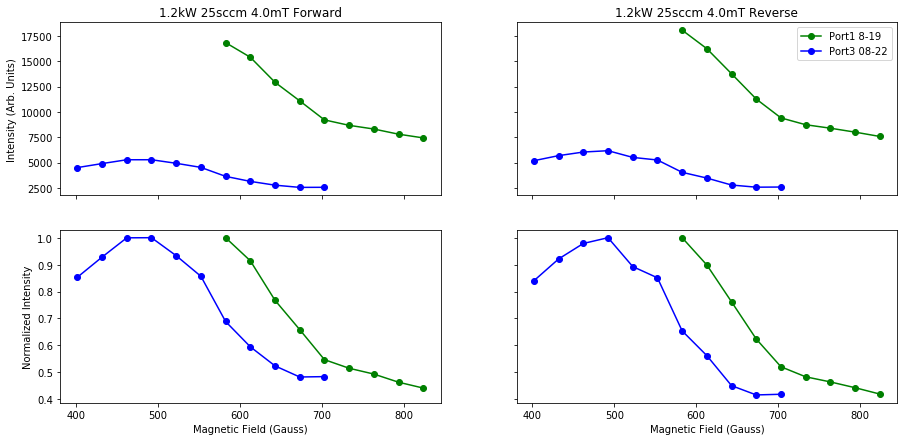

In [205]:
#Let's plot it!

#As you can see, I was lazy and copy and pasted some of the code I had written in a previous program comparing
#the neutrals and ions at a single port-- again, these plots here are meant to compare a single wavelength at
#multiple ports!

#Please feel free to make edits here and ask questions regarding what we are plotting here and how we got it.

fg, ((ax1,ax2), (ax3,ax4)) = plt.subplots(2, 2, sharex='col', sharey='row', figsize=(15,7) )

ax1.plot(bf1,if1,'-o',color='g',label= 'Port1 '+ filename[38:43])
ax1.plot(bf3,if3,'-o', color='b', label='Port3 ' + filename[38:43])
ax1.set_ylabel('Intensity (Arb. Units)')
ax1.set_title(filename[6:25] + 'Forward')


ax3.plot(bf1,inf1,'-o',color='g',label='Port1 ' + filename[38:43])
ax3.plot(bf3,inf3,'-o', color='b', label='Port3 ' + filename[38:43])
#ax3.legend() 
ax3.set_ylabel('Normalized Intensity')
ax3.set_xlabel('Magnetic Field (Gauss)')

ax2.plot(br1,ir1,'-o',color='g',label='Port1 8-19')
ax2.plot(br3,ir3,'-o', color='b', label='Port3 ' + filename[38:43])
#ax3.set_ylabel('Integrated Intensity (Arb. Units)')
ax2.legend()
ax2.set_title(filename[6:25] + 'Reverse')

ax4.plot(br1,inr1,'-o',color='g',label='Neutral Port3 ' + filename[38:43])
ax4.plot(br3,inr3,'-o', color='b', label='Ion Port3 ' + filename[38:43])
#ax4.legend() 
ax4.set_xlabel('Magnetic Field (Gauss)')

plt.savefig('/Users/kellygarcia/Google Drive/Test/' + filename[6:25]  + str(pick_wl) + 'nm Intensity.png')
print 'done'

In [ ]:
#Notice: At this parameter, the hysteresis is also not so evident (that is okay). In addition, the ion light
#is more intense at port 1 than at port 3. Check to see if the same can be said about the neutral light emission.

#This plot also is NOT integrated light intensity- using the other github program, please integrate the light
#emission data and compare the not integrated plots with those that are integrated.